**Fundamentos de Data Science**
Analizando la Rotación de Clientes en Telecomunicaciones

**Cargar los Datos**
Carga el archivo WA_Fn-UseC_-Telco-Customer-Churn.csv en un DataFrame de Pandas.



In [ ]:
# Importamos librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive # Importamos la libreria para montar Google Drive

# Montar Google Drive
drive.mount('/content/drive')

def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV utilizando Pandas
    datos = pd.read_csv(ruta_archivo)
    return datos

# Define la ruta del archivo fuera de la función
ruta_archivo =  "/content/drive/MyDrive/Colab Notebooks/BD/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Llama a la función para cargar los datos y asigna el resultado a la variable 'df'
df = cargar_datos(ruta_archivo)

#Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  Streami

In [ ]:
#Muestro las primeras filas del dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**1.-Limpieza de datos con Python:**
Identificar y solucionar cualquier valor duplicado.
Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).


In [ ]:
# identifica valores duplicados
df.duplicated().sum()

np.int64(0)

Resultado anterior indica que no existen registros duplicados

In [ ]:
 #Validación de tipos de datos
print("\nTipos de datos iniciales:")
print(df.dtypes)



Tipos de datos iniciales:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
#Se modificará el tipo de dato de la columna TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
#Se estandariza nombre de columnas dejando el nombre en minúsculas
df.columns = df.columns.str.lower()
df.head(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#Se revisa si existen valores nulos
df.isnull().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
#La columna totalcharges tiene datos nulos, por lo que se asignará valor de promedio
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].mean())


In [ ]:
#Se valida que ya no existan valores nulos
df.isnull().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
# Validación de datos inconsistente (tenure no puede ser negativo o mayor a 100)
print(df['tenure'].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


De acuerdo al resultado anterior, la columna tenure estaría dentro del rango requerido

In [ ]:
#modificar columna para quede en minuscula
df.columns = df.columns.str.lower()
df.head(10)


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Exploración de datos con Python:**
Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


**Distribución univariada**

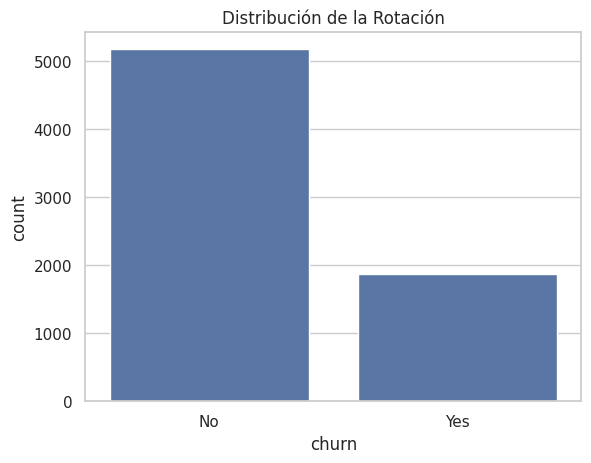

In [ ]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Distribución de la Rotación")
plt.show()

Según el gráfico anterior se visualiza que existe una tendencia mayor a la NO rotación, siendo ésta una cantidad menor para el parametro Yes, que rerpesenta menos de un 50%

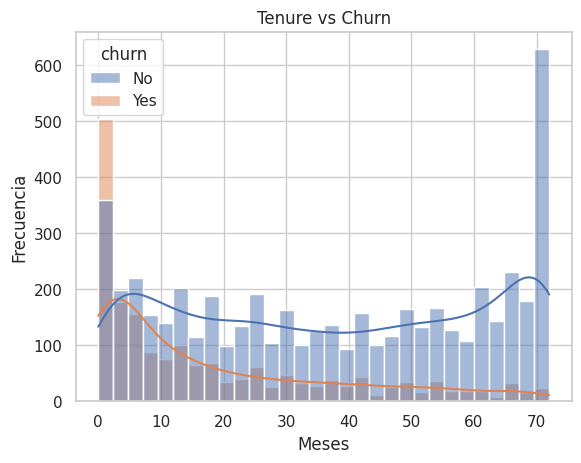

In [ ]:
# Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='churn', bins=30, kde=True)
plt.title("Tenure vs Churn")
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.show()

El gráfico anterior refleja una tendencia significativa a la rotación (YES) en los primeros meses, la cual comienza a disminuir a medida que los meses aumentan, marcando una tendencia mayor al NO Churn

**Distribución Multivariada**

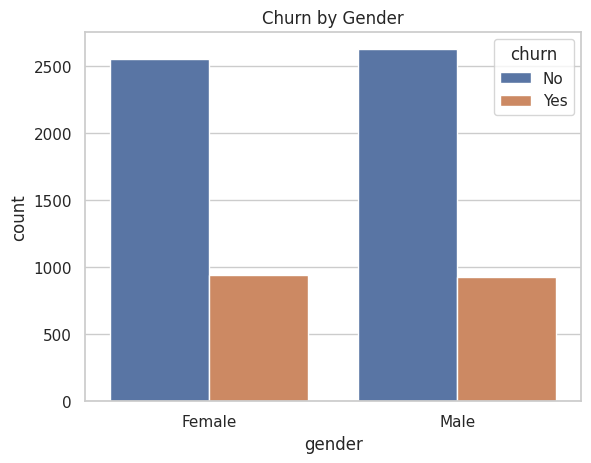

In [ ]:
# Gender vs Churn  .
sns.set(style="whitegrid")
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Churn by Gender")
plt.show()


En el gráfico anterior se puede ver que la rotación según género es casi similar, no obstante existe una pequeña diferencia donde el género femenino supera por una cantidad mínima..

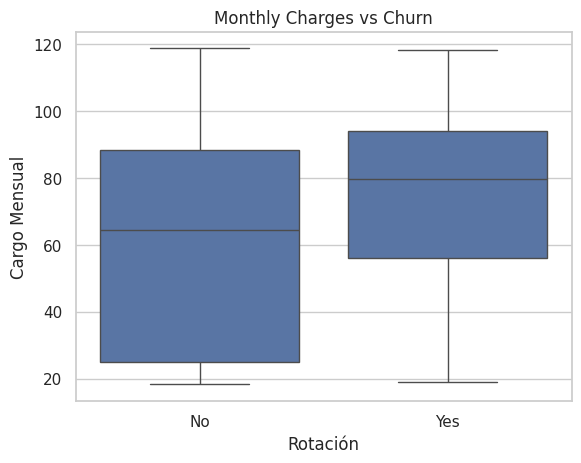

In [ ]:
# Charges Distribution by Churn
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Rotación')
plt.ylabel('Cargo Mensual')
plt.show()

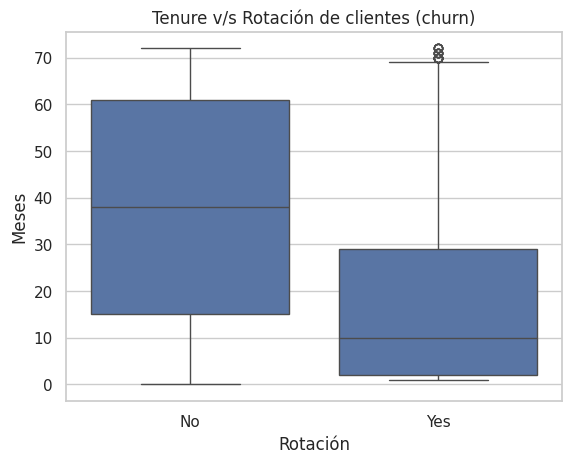

In [ ]:
# Gráfico boxplot tenure vs churn
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tenure v/s Rotación de clientes (churn)')
plt.xlabel('Rotación')
plt.ylabel('Meses')
plt.show()


El gráfico anterior muestra la tendencia marcada a la rotación en relación a los primeros meses, la cual disminuye al aumentar los meses en relación al aumento de la NO rotación. Por otro lado se identifican datos outlayer en la tendencia YES.